In [1]:
import os
import sys
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (22,8)
np.random.seed(30)
sns.set_theme(style="darkgrid")
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = r"../data/air_quality"
allFiles = glob.glob(path+ "/*.csv")

lst = []
for f in allFiles:
   df = pd.read_csv(f, index_col=None, header=0)
   lst.append(df)
    
df = pd.concat(lst)
cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
      'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
df = df[cols]
df = df.sort_values(['station', 'year'])

df.to_csv("../data/air-quality-index.csv", index=False)
df = pd.read_csv("../data/air-quality-index.csv")
df.tail(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [5]:
missing_value = df.isnull().sum()
missing_value

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
total_cells = np.product(df.shape)
total_missing_value = missing_value.sum()

missing_percentage = (total_missing_value/total_cells) * 100
missing_percentage

0.9774058652538005

In [7]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['TEMP'].fillna(df['TEMP'].median(), inplace=True)
df['PRES'].fillna(df['PRES'].median(), inplace=True)
df['DEWP'].fillna(df['DEWP'].median(), inplace=True)
df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)
df['wd'].fillna(method='ffill', inplace=True)

In [8]:
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2358,2359,2013,6,7,6,115.0,120.0,5.0,60.0,1800.0,4.0,20.4,1002.5,18.9,0.0,E,1.0,Aotizhongxin
185972,10653,2014,5,18,20,172.0,349.0,38.0,82.0,1600.0,184.0,26.8,998.7,14.9,0.0,SW,1.6,Gucheng
139671,34480,2017,2,4,15,324.0,399.0,52.0,114.0,3600.0,35.0,9.1,1011.3,-7.6,0.0,SSW,1.2,Dongsi
95439,25312,2016,1,19,15,40.0,50.0,20.0,29.0,800.0,56.0,0.1,1019.5,-23.6,0.0,W,3.6,Dingling
278170,32723,2016,11,23,10,27.0,49.0,17.0,51.0,1000.0,17.0,-0.5,1033.2,-14.8,0.0,WNW,1.4,Nongzhanguan


In [9]:
def plot_pollution(x, y):
    temp_df = df[[y, x, 'station']].groupby([x]).median().reset_index().sort_values(by=x,ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x=x, y=y, data=temp_df)

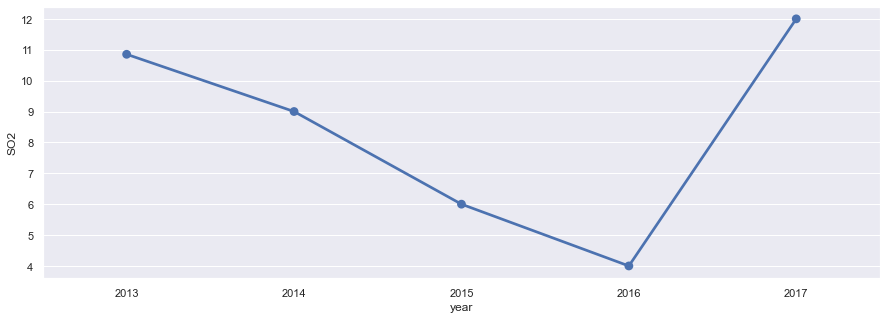

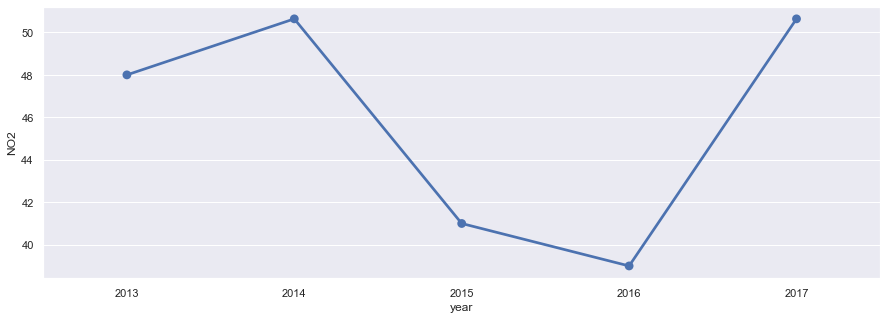

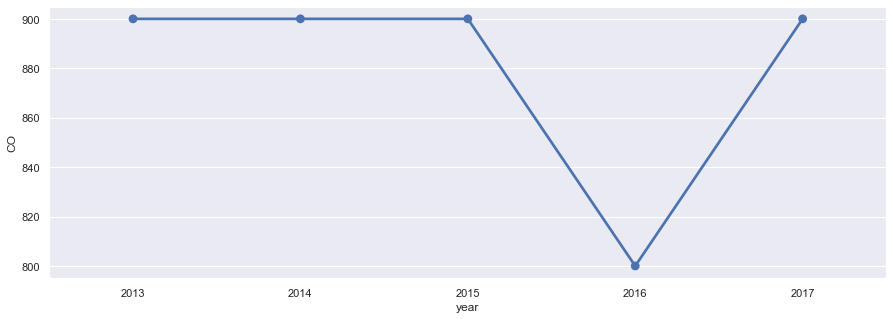

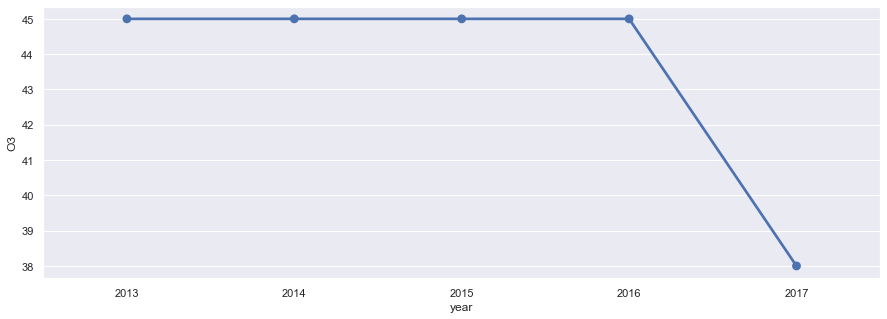

In [10]:
xs = ['SO2', 'NO2', 'CO', 'O3']
for x in xs:
    plot_pollution('year', x)
    

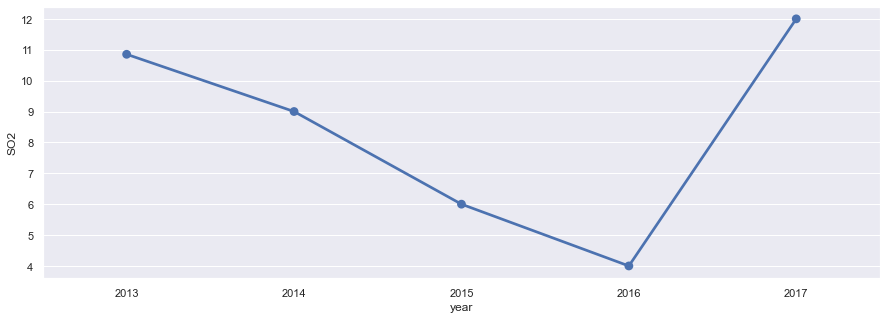

In [11]:
plot_pollution('year', 'SO2')

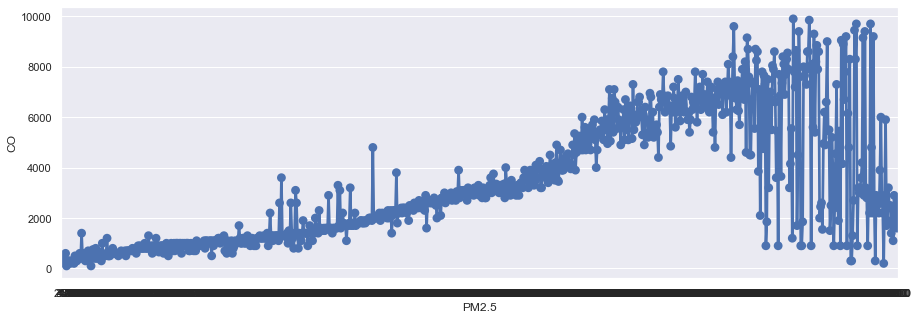

In [12]:
plot_pollution('PM2.5', 'CO')

In [13]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("air-quality-index.html")

In [14]:
# Prepare train, test data
from sklearn.model_selection import train_test_split

X, y = df[['SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']], df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(294537, 9) (126231, 9)
(294537,) (126231,)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([107.64472391, 160.49701849, 207.08704478, ...,  21.15899897,
        60.07454389,  85.33126968])

In [16]:
y = np.array(y_test)
yp = np.array(y_pred).flatten()
t_df = pd.DataFrame({"test": y, "predictions": yp})
t_df.sample(10)

,test,predictions
120281,25.0,40.252199
40097,61.0,69.475180
47584,31.0,94.593650
116533,8.0,20.370385
91170,87.0,68.195918
24190,32.0,59.941472
120397,5.0,21.433873
49811,119.0,100.756200
56717,91.0,88.604730
4400,278.0,205.389035
